# LLM-Empowered Agent-Based Simulation
## Macro-level Comparison of Two Experiments

This notebook demonstrates how micro-level cognitive differences
(memory + personality) lead to different macro-level dynamics,
following the evaluation framework proposed in
*Humanities and Social Sciences Communications (2024)*.


In [46]:
import matplotlib.pyplot as plt

In [47]:
class Agent:
    def __init__(self, agent_id, personality):
        self.id = agent_id
        self.personality = personality  # aggressive | cautious
        self.speed = 3
        self.position = 0
        self.memory = []

    def perceive(self, front_agent):
        if front_agent is None:
            return None
        return front_agent.position - self.position

    def reason(self, distance):
        recent_memory = self.memory[-2:]
        recently_in_danger = any("خطر" in m for m in recent_memory)

        if distance is not None and distance < 5:
            if self.personality == "aggressive":
                action = "slow"
                thought = "فاصله کمه ولی عجولم، کمی ترمز می‌کنم"
            else:
                action = "brake"
                thought = "خطر زیاده، ترمز کامل"

        elif recently_in_danger:
            action = "slow"
            thought = "اخیراً خطر حس کردم، محتاط‌تر حرکت می‌کنم"

        else:
            action = "move"
            thought = "شرایط امنه، حرکت می‌کنم"

        self.memory.append(thought)
        if len(self.memory) > 3:  # memory decay
            self.memory.pop(0)

        return action, thought

    def act(self, action):
        if action == "brake":
            self.speed = max(0, self.speed - 2)
        elif action == "slow":
            self.speed = max(0, self.speed - 1)
        elif action == "move":
            self.speed = min(5, self.speed + 1)

        self.position += self.speed


In [48]:
def run_simulation(personalities, steps=10):
    # --- create agents ---
    agents = [Agent(i, p) for i, p in enumerate(personalities)]

    # ✅ updated initial conditions
    initial_positions = [0, 2, 3]
    initial_speeds = [3, 2, 1]

    for agent, pos, spd in zip(agents, initial_positions, initial_speeds):
        agent.position = pos
        agent.speed = spd

    # history containers
    speed_history = {i: [] for i in range(len(agents))}
    position_history = {i: [] for i in range(len(agents))}

    # --- simulation loop ---
    for step in range(steps):
        actions = []

        # Phase 1: perception + reasoning
        for i, agent in enumerate(agents):
            front = agents[i + 1] if i + 1 < len(agents) else None
            distance = agent.perceive(front)
            action, thought = agent.reason(distance)
            actions.append(action)

        # Phase 2: action (simultaneous update)
        for agent, action in zip(agents, actions):
            agent.act(action)

        # logging
        for agent in agents:
            speed_history[agent.id].append(agent.speed)
            position_history[agent.id].append(agent.position)

    return speed_history, position_history


In [49]:
exp1_personalities = ["aggressive", "cautious", "cautious"]
exp1_speeds, exp1_positions = run_simulation(exp1_personalities)


In [50]:
exp2_personalities = ["cautious", "cautious", "cautious"]
exp2_speeds, exp2_positions = run_simulation(exp2_personalities)


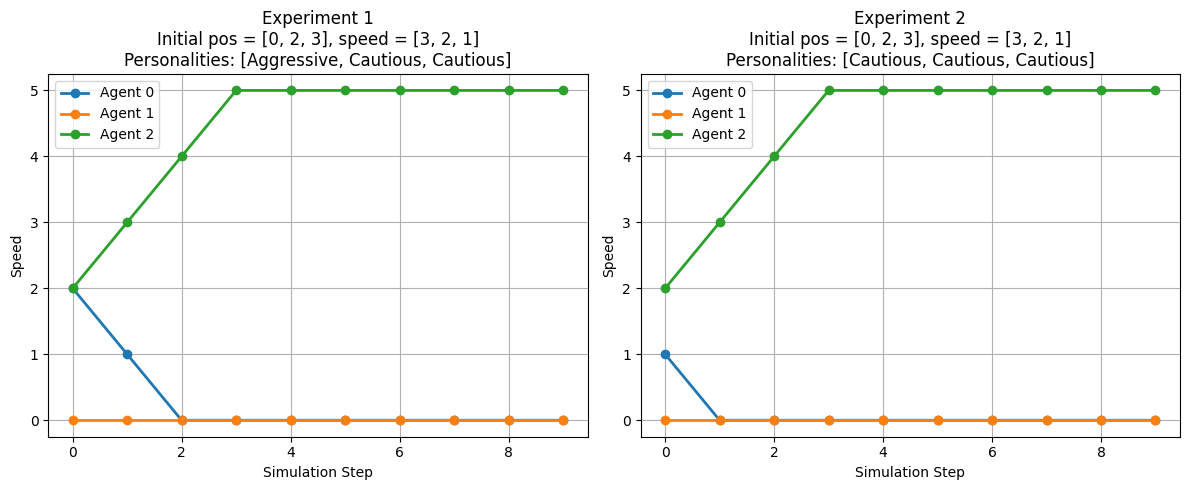

In [52]:
plt.figure(figsize=(12, 5))

# -------- Experiment 1 --------
plt.subplot(1, 2, 1)
for agent_id, speeds in exp1_speeds.items():
    plt.plot(
        speeds,
        marker='o',
        linewidth=2,
        label=f"Agent {agent_id}"
    )

plt.title(
    "Experiment 1\n"
    "Initial pos = [0, 2, 3], speed = [3, 2, 1]\n"
    "Personalities: [Aggressive, Cautious, Cautious]"
)
plt.xlabel("Simulation Step")
plt.ylabel("Speed")
plt.legend()
plt.grid(True)


# -------- Experiment 2 --------
plt.subplot(1, 2, 2)
for agent_id, speeds in exp2_speeds.items():
    plt.plot(
        speeds,
        marker='o',
        linewidth=2,
        label=f"Agent {agent_id}"
    )

plt.title(
    "Experiment 2\n"
    "Initial pos = [0, 2, 3], speed = [3, 2, 1]\n"
    "Personalities: [Cautious, Cautious, Cautious]"
)
plt.xlabel("Simulation Step")
plt.ylabel("Speed")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Analysis

The comparison clearly demonstrates that changing agent-level
cognitive traits (personality + memory) leads to significantly
different macro-level dynamics.

- Experiment 1 exhibits queue formation and freezing behavior.
- Experiment 2 shows smoother and more homogeneous speed patterns.

This validates the claim in the survey paper that memory-driven
LLM-inspired agents can generate emergent system-level phenomena.
